In [0]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe

In [0]:
#https://youtu.be/t69nhvLpilw
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=Mwu_sWHv4jEo
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


El Promedio de la Primera Pregunta es: X= 4.2
La Desviación Muestral de la Primera Pregunta es: S= 0.7
El Estadistico de Prueba T con Varianza Desconocida de la Primera Pregunta es: t= 0.6388765649999406
El Valor Crítico T de la Primera Pregunta es: Tc= -2.13184678133629
Prueba de Hipótesis T de la Primera Pregunta con H0:  Encaja en la Zona de Aceptación


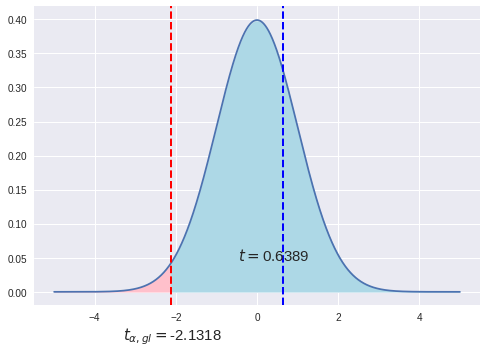

El Estadistico de Prueba Z con Varianza Desconocida de la Primera Pregunta es: z= 0.6388765649999406
El Valor Crítico Z de la Primera Pregunta es: Zc= -1.6448536269514729
Prueba de Hipótesis Z de la Primera Pregunta con H0:  Encaja en la Zona de Aceptación


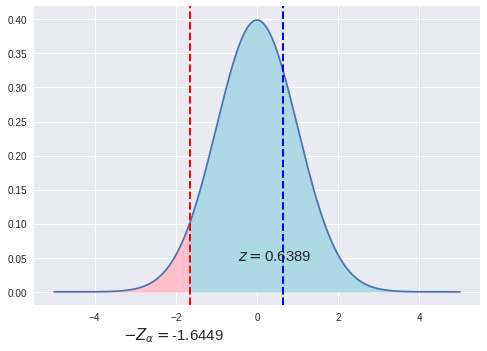

El Estadistico de Prueba T con Varianza Desconocida de la Primera Pregunta es: t= 3.8332593899996406
El Valor Crítico T de la Primera Pregunta es: Tc= 2.13184678133629
Prueba de Hipótesis T de la Primera Pregunta con H1:  Encaja en la Zona de Aceptación


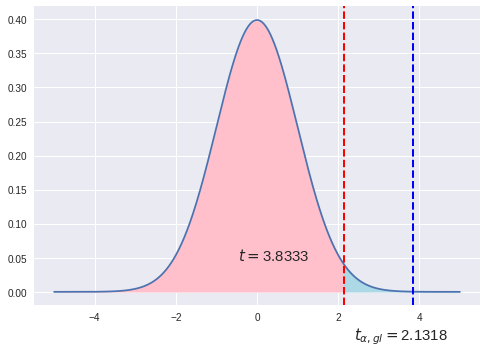

El Estadistico de Prueba Z con Varianza Desconocida de la Primera Pregunta es: z= 0.6388765649999406
El Valor Crítico Z de la Primera Pregunta es: Zc= 1.6448536269514729
Prueba de Hipótesis Z de la Primera Pregunta con H1:  Encaja en la Zona de Rechazo


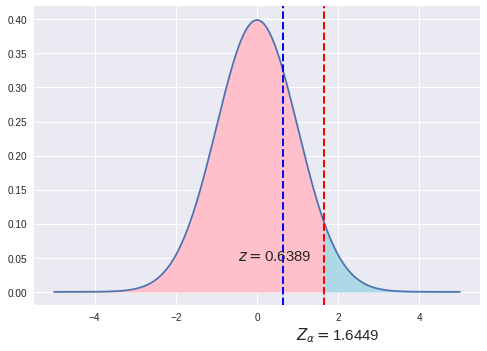

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [66]:
miLibro = gc.open_by_url('https://docs.google.com/spreadsheets/d/1yseapBbHwnan9ukdTJjFtMPui2PTfvhJnla_hlCEzo0/edit#gid=794530402').sheet1;
# get_all_values gives a list of rows.
filas = miLibro.get_all_values();
# print(filas);

import math
import scipy.stats as st
from scipy.stats import t
# Convert to a DataFrame and render.
import pandas as pd
datos=pd.DataFrame.from_records(filas);

#datos.head()


def dar_promedio(data,columna):
  promedio=0.0;
  total=0.0;
  # iterate over rows with iterrows()
  for index, row in data.iterrows():
    if index == 0:
      #print("Fila de Etiquetas");
      pass
    else:
      #print(index, row[1], row[2])
      #print(row[1]);
      total=total+float(row[columna]);
  N=len(data.index)-1;    
  promedio=total/float(N);
  return promedio

def dar_promedioMejorado(data,columna):
  data1=datos.tail(-1)[columna].astype(float); # Quitamos la primera fila y convertimos a flotante
  return data1.mean()
  #df1=(data1 - data1.mean()) / data1.std()
  #print(df1 ) 
  
def dar_desviacionMuestralMejorado(data,columna):
  data1=datos.tail(-1)[columna].astype(float); # Quitamos la primera fila y convertimos a flotante
  return data1.std(ddof=1) # Desviacion estandar con N-1

def dar_desviacionMuestral(data,columna):
  promedio=dar_promedio(data,columna);
  total=0.0;
  # iterate over rows with iterrows()
  for index, row in data.iterrows():
    if index == 0:
      pass
    else:
      #print(index, row[1], row[2])
      #print(row[1]);
      total=total+math.pow(float(row[columna])-promedio,2);
  N=len(data.index)-2;    
  desviacionMuestral=total/float(N);
  return desviacionMuestral

def dar_estadisticoDePruebaTconH0(promedioMuestral, promedioPoblacional, desviacionMuestral, cantidadDeMuestras):
  t=(promedioMuestral-promedioPoblacional)/(desviacionMuestral/math.sqrt(cantidadDeMuestras))
  return t

def dar_estadisticoDePruebaTconH1(promedioMuestral, promedioPoblacional, desviacionMuestral, cantidadDeMuestras):
  t=(promedioMuestral-promedioPoblacional)/(desviacionMuestral/math.sqrt(cantidadDeMuestras))
  return t


def dar_valorCriticoTconH0(nivelDeSignificancia,cantidadDeMuestras):
  valorCritico=-t.ppf(1.0 - nivelDeSignificancia, cantidadDeMuestras-1);
  return valorCritico

def dar_valorCriticoTconH1(nivelDeSignificancia,cantidadDeMuestras):
  valorCritico=t.ppf(1.0 - nivelDeSignificancia, cantidadDeMuestras-1);
  return valorCritico

def dar_pruebaHipotesisTconH0(estadisticoDePruebaT, valorCriticoT):
  if estadisticoDePruebaT>valorCriticoT:
    return "Encaja en la Zona de Aceptación"
  else:
    return "Encaja en la Zona de Rechazo"

def dar_pruebaHipotesisTconH1(estadisticoDePruebaT, valorCriticoT):
  if estadisticoDePruebaT>valorCriticoT:
    return "Encaja en la Zona de Aceptación"
  else:
    return "Encaja en la Zona de Rechazo"

  
def dar_estadisticoDePruebaZconH0(promedioMuestral, promedioPoblacional, desviacionMuestral, cantidadDeMuestras):
  z=(promedioMuestral-promedioPoblacional)/(desviacionMuestral/math.sqrt(cantidadDeMuestras));
  return z

def dar_estadisticoDePruebaZconH1(promedioMuestral, promedioPoblacional, desviacionMuestral, cantidadDeMuestras):
  z=(promedioMuestral-promedioPoblacional)/(desviacionMuestral/math.sqrt(cantidadDeMuestras));
  return z

def dar_valorCriticoZconH0(nivelDeSignificancia):
  valorCritico=st.norm.ppf(nivelDeSignificancia); # Por defecto es de cola izquierda
  return valorCritico

def dar_valorCriticoZconH1(nivelDeSignificancia):
  valorCritico=-st.norm.ppf(nivelDeSignificancia); # Por defecto es de cola izquierda
  return valorCritico

def dar_pruebaHipotesisZconH0(estadisticoDePruebaZ, valorCriticoZ):
  if estadisticoDePruebaZ>valorCriticoZ:
    return "Encaja en la Zona de Aceptación"
  else:
    return "Encaja en la Zona de Rechazo"

def dar_pruebaHipotesisZconH1(estadisticoDePruebaZ, valorCriticoZ):
  if estadisticoDePruebaZ>valorCriticoZ:
    return "Encaja en la Zona de Aceptación"
  else:
    return "Encaja en la Zona de Rechazo"
  
  
# Primera Pregunta
promedio1=dar_promedio(datos,1);
print("El Promedio de la Primera Pregunta es: X=",promedio1);
S1=dar_desviacionMuestral(datos,1);
print("La Desviación Muestral de la Primera Pregunta es: S=",S1);
# Distribucion T Student
N=len(datos.index)-1;

# Prueba de Hipótesis con H0: Hipotesis de Trabajo
t1=dar_estadisticoDePruebaTconH0(promedio1,4,S1,N);
print("El Estadistico de Prueba T con Varianza Desconocida de la Primera Pregunta es: t=",t1);
tc1=dar_valorCriticoTconH0(0.05,N);
print("El Valor Crítico T de la Primera Pregunta es: Tc=",tc1);
print("Prueba de Hipótesis T de la Primera Pregunta con H0: ",dar_pruebaHipotesisTconH0(t1,tc1));

#data = (x - mean(x)) / S / sqrt(n)
# plot the t-distribution pdf
from numpy import arange
import numpy as np
from matplotlib import pyplot
from scipy.stats import t
# define the distribution parameters
x_max=5;
sample_space = arange(-x_max, x_max, 0.001)
dof = len(sample_space) - 1
# calculate the pdf
pdf = t.pdf(sample_space, dof)
# plot
pyplot.plot(sample_space, pdf)

thresh = tc1; # Graficamos el Valor Crítico Tc en rojo
pyplot.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)

thresh = t1; # Graficamos el Valor de Prueba Estadístico T en azul
pyplot.axvline(x=thresh, color='b', linestyle='dashed', linewidth=2)

#Zona de Rechazo en color rojo claro
x = np.linspace(-x_max, tc1, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,t.pdf(x, dof), color="pink")
#Zona de Aceptación en color azul claro
x = np.linspace(tc1,x_max, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,t.pdf(x, dof), color="lightblue")


pyplot.figtext(0.28, 0.04, r'$t_{\alpha,gl}=$%s'%(round(tc1,4)), fontsize=15)
pyplot.figtext(0.48, 0.24, r'$t=$%s'%(round(t1,4)), fontsize=15)

pyplot.show()

# Distribucion Normal Z con H0
z1=dar_estadisticoDePruebaZconH0(promedio1,4,S1,N);
print("El Estadistico de Prueba Z con Varianza Desconocida de la Primera Pregunta es: z=",z1);
zc1=dar_valorCriticoZconH0(0.05);
print("El Valor Crítico Z de la Primera Pregunta es: Zc=",zc1);
print("Prueba de Hipótesis Z de la Primera Pregunta con H0: ",dar_pruebaHipotesisZconH0(z1,zc1));

#data = (x - mean(x)) / S / sqrt(n)
# plot the t-distribution pdf
from numpy import arange
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
x_max=5;
mean = 0.0;
stdev = 1.0;
sample_space = arange(-x_max, x_max, 0.001)
dof = len(sample_space) - 1
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
pyplot.plot(sample_space, pdf)

thresh = zc1; # Graficamos el Valor Crítico Tc en rojo
pyplot.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)

thresh = z1; # Graficamos el Valor de Prueba Estadístico T en azul
pyplot.axvline(x=thresh, color='b', linestyle='dashed', linewidth=2)

#Zona de Rechazo en color rojo claro
x = np.linspace(-x_max, zc1, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,norm.pdf(x, mean, stdev), color="pink")
#Zona de Aceptación en color azul claro
x = np.linspace(zc1,x_max, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,norm.pdf(x, mean, stdev), color="lightblue")


pyplot.figtext(0.28, 0.04, r'$-Z_{\alpha}=$%s'%(round(zc1,4)), fontsize=15)
pyplot.figtext(0.48, 0.24, r'$z=$%s'%(round(z1,4)), fontsize=15)

pyplot.show()



# Prueba de Hipótesis con H1: Hipotesis de Trabajo
t1=dar_estadisticoDePruebaTconH1(promedio1,3,S1,N);
print("El Estadistico de Prueba T con Varianza Desconocida de la Primera Pregunta es: t=",t1);
tc1=dar_valorCriticoTconH1(0.05,N);
print("El Valor Crítico T de la Primera Pregunta es: Tc=",tc1);
print("Prueba de Hipótesis T de la Primera Pregunta con H1: ",dar_pruebaHipotesisTconH1(t1,tc1));

#data = (x - mean(x)) / S / sqrt(n)
# plot the t-distribution pdf
from numpy import arange
import numpy as np
from matplotlib import pyplot
from scipy.stats import t
# define the distribution parameters
x_max=5;
sample_space = arange(-x_max, x_max, 0.001)
dof = len(sample_space) - 1
# calculate the pdf
pdf = t.pdf(sample_space, dof)
# plot
pyplot.plot(sample_space, pdf)

thresh = tc1; # Graficamos el Valor Crítico Tc en rojo
pyplot.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)

thresh = t1; # Graficamos el Valor de Prueba Estadístico T en azul
pyplot.axvline(x=thresh, color='b', linestyle='dashed', linewidth=2)

#Zona de Aceptación en color azul claro
x = np.linspace(tc1, x_max, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,t.pdf(x, dof), color="lightblue")
#pylab.title('Minimal Energy Configuration of %s Charges on Disc W = %s'%(N, W))
#Zona de Rechazo en color rojo claro
x = np.linspace(-x_max,tc1, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,t.pdf(x, dof), color="pink")


pyplot.figtext(0.68, 0.04, r'$t_{\alpha,gl}=$%s'%(round(tc1,4)), fontsize=15)
pyplot.figtext(0.48, 0.24, r'$t=$%s'%(round(t1,4)), fontsize=15)

pyplot.show()

# Distribucion Normal Z con H1
z1=dar_estadisticoDePruebaZconH1(promedio1,4,S1,N);
print("El Estadistico de Prueba Z con Varianza Desconocida de la Primera Pregunta es: z=",z1);
zc1=dar_valorCriticoZconH1(0.05);
print("El Valor Crítico Z de la Primera Pregunta es: Zc=",zc1);
print("Prueba de Hipótesis Z de la Primera Pregunta con H1: ",dar_pruebaHipotesisZconH1(z1,zc1));

#data = (x - mean(x)) / S / sqrt(n)
# plot the t-distribution pdf
from numpy import arange
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
x_max=5;
mean = 0.0;
stdev = 1.0;
sample_space = arange(-x_max, x_max, 0.001)
dof = len(sample_space) - 1
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
pyplot.plot(sample_space, pdf)

thresh = zc1; # Graficamos el Valor Crítico Tc en rojo
pyplot.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)

thresh = z1; # Graficamos el Valor de Prueba Estadístico T en azul
pyplot.axvline(x=thresh, color='b', linestyle='dashed', linewidth=2)

#Zona de Rechazo en color rojo claro
x = np.linspace(-x_max, zc1, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,norm.pdf(x, mean, stdev), color="pink")
#Zona de Aceptación en color azul claro
x = np.linspace(zc1,x_max, 100) # Sombreamos el area crítica
dof = len(x) - 1
pyplot.fill_between(x,norm.pdf(x, mean, stdev), color="lightblue")


pyplot.figtext(0.58, 0.04, r'$Z_{\alpha}=$%s'%(round(zc1,4)), fontsize=15)
pyplot.figtext(0.48, 0.24, r'$z=$%s'%(round(z1,4)), fontsize=15)

pyplot.show()


print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%");


# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/


Preguntas Pregunta Promedio Desviacion Muestral Estadistico de Prueba  \
index                                                                   
0               P1      4.2             0.83666               3.20713   
1               P2      4.6            0.547723               6.53197   

Preguntas Valor Crítico  Decision  
index                              
0               2.13185  Aceptado  
1               2.13185  Aceptado  


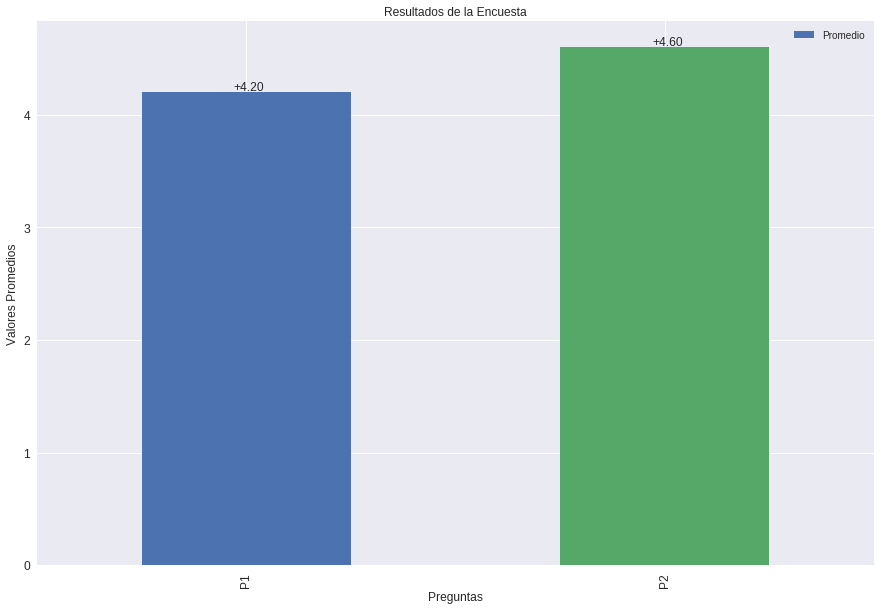

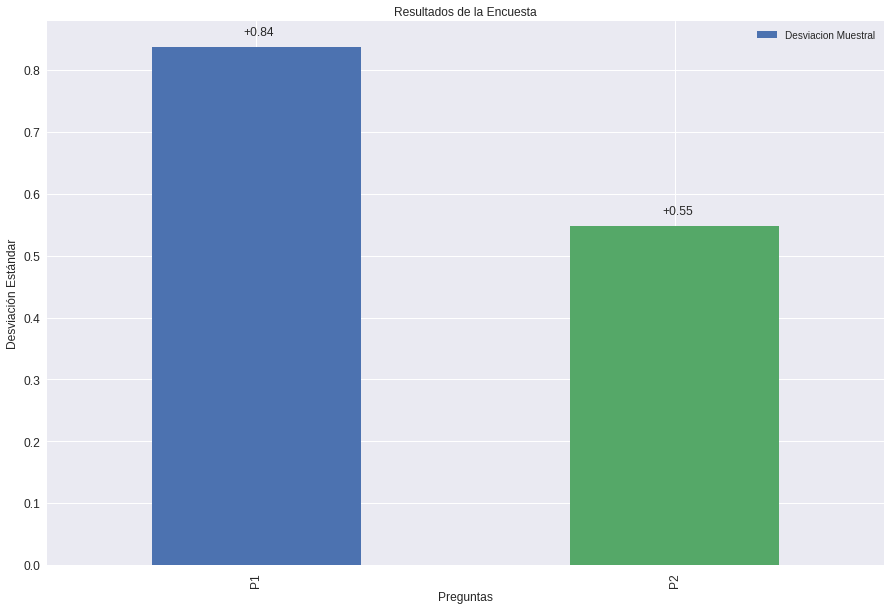

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


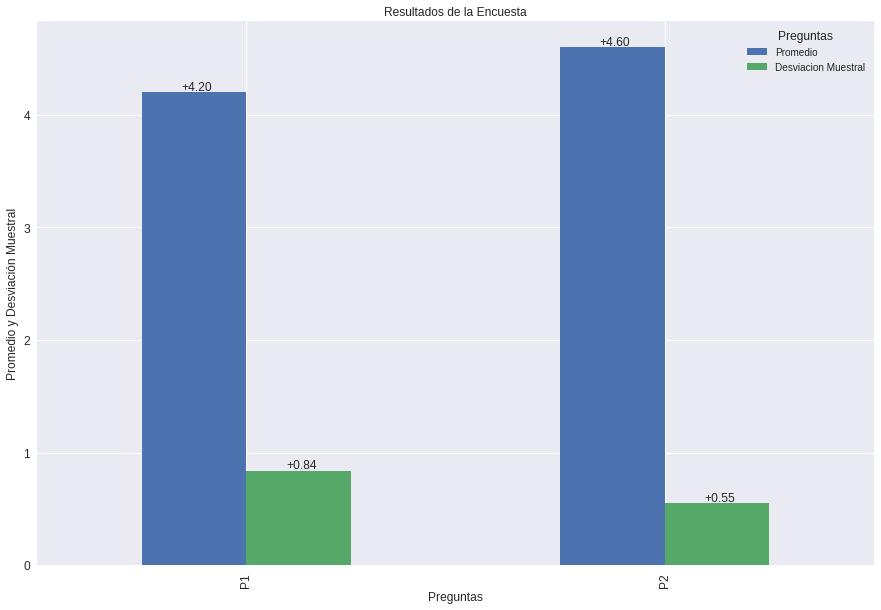

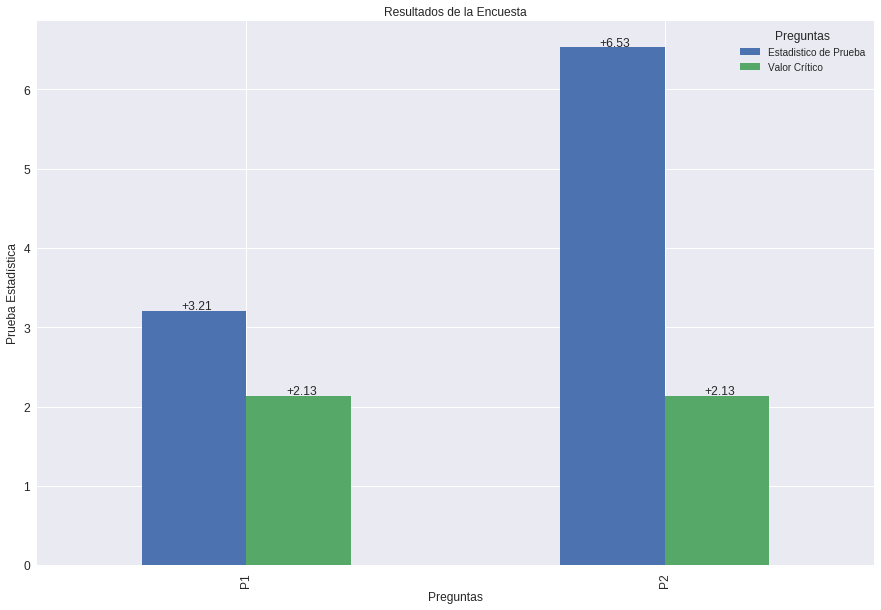

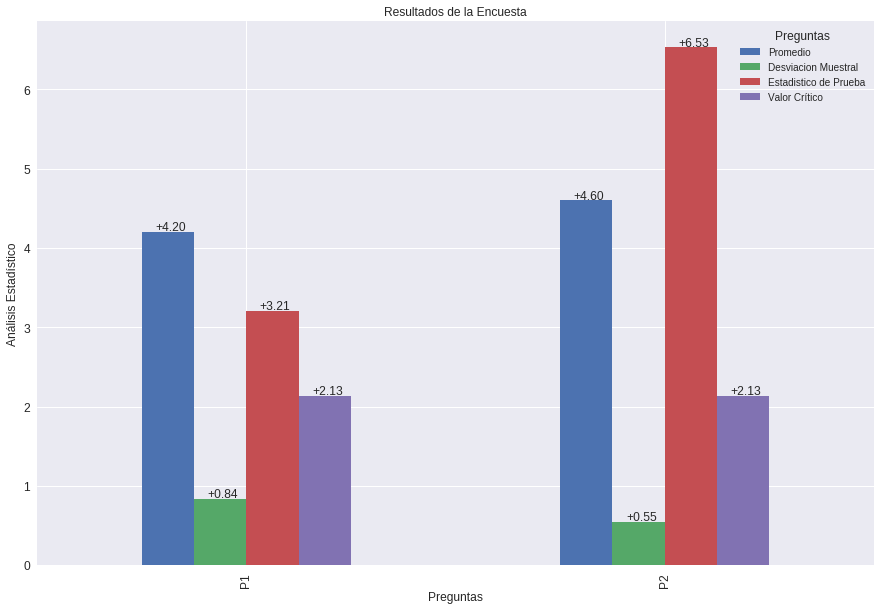

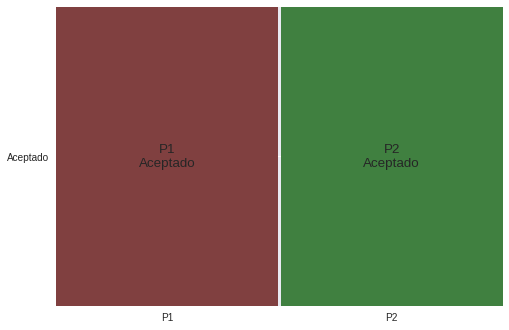

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


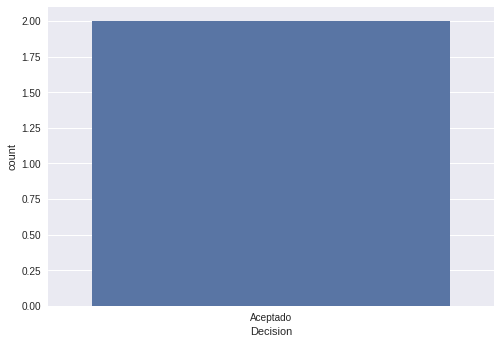

In [57]:
miLibro = gc.open_by_url('https://docs.google.com/spreadsheets/d/1yseapBbHwnan9ukdTJjFtMPui2PTfvhJnla_hlCEzo0/edit#gid=794530402').sheet1;
# get_all_values gives a list of rows.
registros = miLibro.get_all_values();
# print(filas);

import math
#import scipy.stats as st
from scipy.stats import t
from pandas import DataFrame
import numpy as np
# Convert to a DataFrame and render.
import pandas as pd
datos=pd.DataFrame.from_records(registros);
datos=datos.tail(-1); # Quitamos 1ra fila de etiquetas del Cuestionario
datos.reset_index(drop=True, inplace=True); # Reseteamos el indice
#filas=len(datos.index);
columnas=len(datos.columns);
estadisticaPromedio=[] # Variable Global
for j in range(1,columnas,1):
  #print("Pregunta ",j);
  global estadisticaPromedio
  estadisticaPromedio.append(datos[j].astype(float).mean());


#print(estadisticaPromedio)
diccionario = {}

etiqueta = ['P' + str(i) for i in range (1, columnas)]
for indice in range(1,len(etiqueta)+1):
  promedioMuestral=datos[indice].astype(float).mean(); # Promedio
  desviacionMuestral=datos[indice].astype(float).std(ddof=1) # Desviacion estandar Muestral con N-1
  promedioPoblacional=3;
  cantidadDeMuestras=len(datos.index);
  t_H1=(promedioMuestral-promedioPoblacional)/(desviacionMuestral/math.sqrt(cantidadDeMuestras));
  nivelDeSignificancia=0.05;
  tc_H1=t.ppf(1.0 - nivelDeSignificancia, cantidadDeMuestras-1);
  if t_H1>tc_H1:
    decision="Aceptado"
  else:
    decision="Rechazado"
  global diccionario
  diccionario[etiqueta[indice-1]]=[promedioMuestral, desviacionMuestral, t_H1, tc_H1, decision]

diccionario['Preguntas']=['Promedio', 'Desviacion Muestral','Estadistico de Prueba','Valor Crítico','Decision']

#print(diccionario)
df=pd.DataFrame.from_dict(diccionario);
df = df.set_index('Preguntas').transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index': 'Pregunta'}, inplace=True)
print(df)
#print(df)
#print(df['Promedio'])
#print(df.iloc[0,0])  




import matplotlib.pyplot as plt
#df.plot(kind='bar',x=df.index.name, y='Promedio')
ax = df.plot(kind='bar',x='Pregunta', y='Promedio', title ="Resultados de la Encuesta", figsize=(15, 10), legend=True, fontsize=12);
ax.set_xlabel("Preguntas",fontsize=12);
ax.set_ylabel("Valores Promedios",fontsize=12);
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

import matplotlib.pyplot as plt
#df.plot(kind='bar',x=df.index.name, y='Promedio')
ax = df.plot(kind='bar',x='Pregunta', y='Desviacion Muestral', title ="Resultados de la Encuesta", figsize=(15, 10), legend=True, fontsize=12);
ax.set_xlabel("Preguntas",fontsize=12);
ax.set_ylabel("Desviación Estándar",fontsize=12);
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()


import matplotlib.pyplot as plt
#df.plot(kind='bar',x=df.index.name, y='Promedio')
ax = df.plot(kind='bar',x='Pregunta', y=['Promedio','Desviacion Muestral'], title ="Resultados de la Encuesta", figsize=(15, 10), legend=True, fontsize=12);
ax.set_xlabel("Preguntas",fontsize=12);
ax.set_ylabel("Promedio y Desviación Muestral",fontsize=12);
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()


import matplotlib.pyplot as plt
#df.plot(kind='bar',x=df.index.name, y='Promedio')
ax = df.plot(kind='bar',x='Pregunta', y=['Estadistico de Prueba','Valor Crítico'], title ="Resultados de la Encuesta", figsize=(15, 10), legend=True, fontsize=12);
ax.set_xlabel("Preguntas",fontsize=12);
ax.set_ylabel("Prueba Estadística",fontsize=12);
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()


import matplotlib.pyplot as plt
#df.plot(kind='bar',x=df.index.name, y='Promedio')
ax = df.plot(kind='bar',x='Pregunta', y=['Promedio', 'Desviacion Muestral','Estadistico de Prueba','Valor Crítico'], title ="Resultados de la Encuesta", figsize=(15, 10), legend=True, fontsize=12);
ax.set_xlabel("Preguntas",fontsize=12);
ax.set_ylabel("Análisis Estadístico",fontsize=12);
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()



#df['Decision'].value_counts().plot(kind='bar')
#df.groupby('Decision').size().plot(kind='bar')
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas
plt.rcParams['font.size'] = 16.0;
mosaic(df, ['Pregunta', 'Decision']);
plt.show()


import pandas as pd
import seaborn as sns
sns.set()
sns.countplot(df['Decision'])





In [113]:

miLibro = gc.open_by_url('https://docs.google.com/spreadsheets/d/1yseapBbHwnan9ukdTJjFtMPui2PTfvhJnla_hlCEzo0/edit#gid=794530402').sheet1;
# get_all_values gives a list of rows.
filas = miLibro.get_all_values();
# print(filas);

import math
import scipy.stats as st
from scipy.stats import t
import numpy as np
# Convert to a DataFrame and render.
import pandas as pd
datos=pd.DataFrame.from_records(filas);

#print(datos)

# Alfa de Cronbach, donde data incluye la fila de las etiquetas
def AlfaDeCronbach(data):
  columnas=len(data.columns);
  #print(columnas)
  sumaFilas=[];
  varianzaColumnas=[];
  # Calculamos la Sumatoria de las Filas
  for index, row in data.iterrows():
    if index == 0:
      #print("Fila de Etiquetas");
      pass
    else:
      sumatoriaFila=0.0;
      for j in range(1,columnas,1):
        df1=data.iloc[index, j]
        sumatoriaFila=float(df1)+sumatoriaFila;
        
      sumaFilas.append(sumatoriaFila);
  # Calculamos la Varianza de las Columnas
  data=data.tail(-1); # Quitamos la primera fila y convertimos a flotante
  data.reset_index(drop=True, inplace=True); # Reseteamos el indice
  for j in range(1,columnas,1):
    varianzaColumnas.append(data[j].astype(float).var(ddof=1));
  #print(varianzaColumnas)
  #print(sumaFilas)
  K=len(data.index);    
  sumaFilas=np.array(sumaFilas);
  varianzaColumnas=np.array(varianzaColumnas);
  #print(K)
  #print(varianzaColumnas.sum())
  #print(sumaFilas.var(ddof=1))
  return math.fabs(K / (K-1.) * (1 - varianzaColumnas.sum() / sumaFilas.var(ddof=1)))
  
print("Alfa de Cronbach: ", AlfaDeCronbach(datos))


def TamañoDeMuestra(tamañoPoblacional,probabilidadDeOcurrencia,errorDeMuestreo,nivelDeSignificancia):
  N=tamañoPoblacional;
  p=probabilidadDeOcurrencia;
  d=errorDeMuestreo;
  q=1-p;
  alfa=nivelDeSignificancia;
  Z=st.norm.ppf(1-nivelDeSignificancia/2.0); # Por defecto es de cola izquierda
  #print(Z)
  return round(N*math.pow(float(Z),2)*p*q/(math.pow(float(d),2)*(N-1)+math.pow(float(Z),2)*p*q),0)

print("Tamaño de la Muestra = ",TamañoDeMuestra(9,0.5,0.05,0.05))

Alfa de Cronbach:  0.5357142857142855
Tamaño de la Muestra =  9.0
